In [ ]:
import pandas as pd

metadata = pd.read_csv('/content/drive/MyDrive/ncbi_datasets.csv')

<ipython-input-1-bb038dc5afb7>:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv('/content/drive/MyDrive/ncbi_datasets.csv')


In [ ]:
metadata.head(5)

,Nucleotide Accession,Species Taxonomy Id,Species Name,Virus Genus,Virus Family,Isolate Name,Nucleotide Length,Sequence Type,Nuc Completeness,Geo Location,US State,Host Name,Host Taxonomy ID,Collection Date,BioProject,BioSample
0,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12,PRJNA485481,NaN
1,OM487257.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/UT-UPHL-220129247957/2021,29815,GenBank,complete,North America; USA,NaN,NaN,9606,2021-12-23,PRJNA614995,SAMN25559487
2,OM403304.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/HKG/VM20001061-2/2020,29870,GenBank,complete,Asia; Hong Kong,NaN,NaN,9606,2020-01-23,NaN,NaN
3,OM403303.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/HKG/Original/2020,29851,GenBank,complete,Asia; Hong Kong,NaN,NaN,9606,2020-01-23,NaN,NaN
4,OM401120.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/UT-UPHL-211112790633/2021,29712,GenBank,complete,North America; USA,NaN,NaN,9606,2021-09-25,PRJNA614995,SAMN23427251


In [ ]:
metadata.shape

(847791, 16)

In [ ]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847791 entries, 0 to 847790
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Nucleotide Accession  847791 non-null  object 
 1   Species Taxonomy Id   847791 non-null  int64  
 2   Species Name          847791 non-null  object 
 3   Virus Genus           847791 non-null  object 
 4   Virus Family          847791 non-null  object 
 5   Isolate Name          609653 non-null  object 
 6   Nucleotide Length     847791 non-null  int64  
 7   Sequence Type         847791 non-null  object 
 8   Nuc Completeness      847791 non-null  object 
 9   Geo Location          847720 non-null  object 
 10  US State              0 non-null       float64
 11  Host Name             0 non-null       float64
 12  Host Taxonomy ID      847791 non-null  int64  
 13  Collection Date       847595 non-null  object 
 14  BioProject            611783 non-null  object 
 15  

In [ ]:
metadata['Collection Date'] = pd.to_datetime(metadata['Collection Date'])

In [ ]:
metadata.dtypes

Nucleotide Accession            object
Species Taxonomy Id              int64
Species Name                    object
Virus Genus                     object
Virus Family                    object
Isolate Name                    object
Nucleotide Length                int64
Sequence Type                   object
Nuc Completeness                object
Geo Location                    object
US State                       float64
Host Name                      float64
Host Taxonomy ID                 int64
Collection Date         datetime64[ns]
BioProject                      object
BioSample                       object
dtype: object

In [ ]:
# replace spaces with "_" in columns
metadata.columns = [c.lower().replace(" ", "_") for c in metadata.columns]
metadata.columns

Index(['nucleotide_accession', 'species_taxonomy_id', 'species_name',
       'virus_genus', 'virus_family', 'isolate_name', 'nucleotide_length',
       'sequence_type', 'nuc_completeness', 'geo_location', 'us_state',
       'host_name', 'host_taxonomy_id', 'collection_date', 'bioproject',
       'biosample'],
      dtype='object')

### EDA

In [ ]:
metadata['continent'] = metadata['geo_location'].str.replace(";.+", "", regex=True)

In [ ]:
metadata.head()

,nucleotide_accession,species_taxonomy_id,species_name,virus_genus,virus_family,isolate_name,nucleotide_length,sequence_type,nuc_completeness,geo_location,us_state,host_name,host_taxonomy_id,collection_date,bioproject,biosample,continent
0,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12-01,PRJNA485481,NaN,Asia
1,OM487257.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/UT-UPHL-220129247957/2021,29815,GenBank,complete,North America; USA,NaN,NaN,9606,2021-12-23,PRJNA614995,SAMN25559487,North America
2,OM403304.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/HKG/VM20001061-2/2020,29870,GenBank,complete,Asia; Hong Kong,NaN,NaN,9606,2020-01-23,NaN,NaN,Asia
3,OM403303.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/HKG/Original/2020,29851,GenBank,complete,Asia; Hong Kong,NaN,NaN,9606,2020-01-23,NaN,NaN,Asia
4,OM401120.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/UT-UPHL-211112790633/2021,29712,GenBank,complete,North America; USA,NaN,NaN,9606,2021-09-25,PRJNA614995,SAMN23427251,North America


In [ ]:
# When the fist case was found per continent
metadata.groupby("continent").apply(lambda x: x.sort_values("collection_date").iloc[0])['collection_date']

continent
Africa          2020-02-06
Asia            2019-12-01
Europe          2020-01-01
North America   2020-01-01
Oceania         2020-01-01
South America   2020-01-01
Name: collection_date, dtype: datetime64[ns]

In [ ]:
metadata['continent'].value_counts()

North America    571069
Europe           254520
Oceania           10603
Asia               8581
Africa             2192
South America       755
Name: continent, dtype: int64

In [ ]:
metadata['nucleotide_length'].describe()

count    847791.000000
mean      29825.747932
std          69.937482
min        2859.000000
25%       29786.000000
50%       29819.000000
75%       29884.000000
max       30018.000000
Name: nucleotide_length, dtype: float64

In [ ]:
# look at this Outlier
metadata[metadata['nucleotide_length'] == metadata['nucleotide_length'].min()]

,nucleotide_accession,species_taxonomy_id,species_name,virus_genus,virus_family,isolate_name,nucleotide_length,sequence_type,nuc_completeness,geo_location,us_state,host_name,host_taxonomy_id,collection_date,bioproject,biosample,continent
847723,LR877184.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,NaN,2859,GenBank,complete,"Europe; Sweden:Stockholm, Sweden",NaN,NaN,9606,2020-04-26,PRJEB39632,SAMEA7098098,Europe


<Axes: >

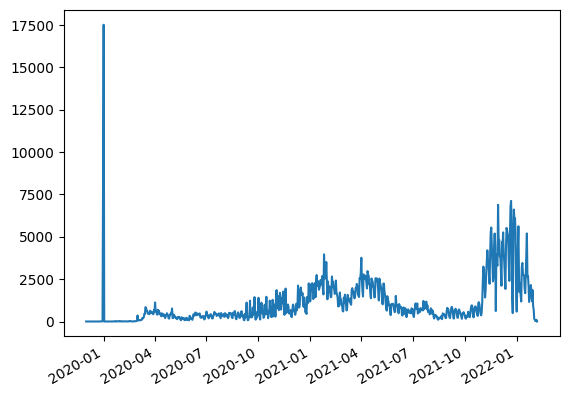

In [ ]:
metadata['collection_date'].value_counts().sort_index().plot()

### Identifyng sequences to download

In [ ]:
metadata[metadata['sequence_type']== 'RefSeq']

,nucleotide_accession,species_taxonomy_id,species_name,virus_genus,virus_family,isolate_name,nucleotide_length,sequence_type,nuc_completeness,geo_location,us_state,host_name,host_taxonomy_id,collection_date,bioproject,biosample,continent
0,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12-01,PRJNA485481,NaN,Asia


In [ ]:
# sequences of Delta variants
metadata[metadata["isolate_name"].str.contains("Delta").fillna(False)]

,nucleotide_accession,species_taxonomy_id,species_name,virus_genus,virus_family,isolate_name,nucleotide_length,sequence_type,nuc_completeness,geo_location,us_state,host_name,host_taxonomy_id,collection_date,bioproject,biosample,continent
85804,OM108163.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-3/2021,29860,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-08-14,NaN,NaN,Asia
85948,OM061695.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-1/2021,29858,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-08-10,NaN,NaN,Asia
251375,OK091006.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,"SARS-CoV-2/human/JPN/SARS-CoV-2, B.1.617.2 lin...",29836,GenBank,complete,Asia; Japan,NaN,NaN,9606,2021-08-24,NaN,NaN,Asia
665095,OM108132.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-2/2021,29858,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-08-11,NaN,NaN,Asia


In [ ]:
# sequences of Omicron variants
metadata[metadata["isolate_name"].str.contains("Omicron").fillna(False)]

,nucleotide_accession,species_taxonomy_id,species_name,virus_genus,virus_family,isolate_name,nucleotide_length,sequence_type,nuc_completeness,geo_location,us_state,host_name,host_taxonomy_id,collection_date,bioproject,biosample,continent
806923,OM095411.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Omicron-1/2021,29788,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-12-08,NaN,NaN,Asia


In [ ]:
import os

sequences = ["NC_045512.2", "OL467832.1", "OM061695.1",  "OM095411.1"] # sequences that we choose and download to work with
human_names = ["reference", "base", "delta", "omicron"] # name of the sequences

In [ ]:
selected_sequences = metadata[metadata["nucleotide_accession"].isin(sequences)]
selected_sequences

,nucleotide_accession,species_taxonomy_id,species_name,virus_genus,virus_family,isolate_name,nucleotide_length,sequence_type,nuc_completeness,geo_location,us_state,host_name,host_taxonomy_id,collection_date,bioproject,biosample,continent
0,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12-01,PRJNA485481,NaN,Asia
85948,OM061695.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-1/2021,29858,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-08-10,NaN,NaN,Asia
254609,OL467832.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/hCoV_19_USA_ID_IVREF_6520...,29831,GenBank,complete,"North America; USA: Bingham, ID",NaN,NaN,9606,2020-01-01,NaN,NaN,North America
806923,OM095411.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Omicron-1/2021,29788,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-12-08,NaN,NaN,Asia


### Downloading the sequences

In [ ]:
# Now that we have the nucleotide accession we have to download the sequences
!pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 33.5 MB/s eta 0:00:00


In [ ]:
from Bio import Entrez
Entrez.email = "gabrieledurante01@gmail.com"

In [ ]:
def download_sequence(id_code):
    handle = Entrez.esearch(db="nucleotide", term=id_code, retmax="1")
    record = Entrez.read(handle)
    handle = Entrez.efetch(db="nucleotide", id=record["IdList"][0], rettype="fasta", retmode="text")
    return handle.read()

In [ ]:
sequence_data = {}
for sequence in sequences:
  sequence_data[sequence] = {'fasta': download_sequence(sequence)}

### Parsing RNA Sequences

In [ ]:
# creating a file object to work with strings
from Bio import SeqIO
import io

for k,v in sequence_data.items():
    f = io.StringIO(v["fasta"])
    sequence_data[k]["parsed"] = list(SeqIO.parse(f, "fasta"))[0]

In [ ]:
sequence_data["NC_045512.2"]["parsed"]

SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='NC_045512.2', name='NC_045512.2', description='NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])

In [ ]:
sequence_data["OM095411.1"]["parsed"]

SeqRecord(seq=Seq('CAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTG...AGC'), id='OM095411.1', name='OM095411.1', description='OM095411.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/CHN/Omicron-1/2021, complete genome', dbxrefs=[])

In [ ]:
sequence_data["OL467832.1"]["parsed"]

SeqRecord(seq=Seq('ACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATC...TAG'), id='OL467832.1', name='OL467832.1', description='OL467832.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/USA/hCoV_19_USA_ID_IVREF_652092_2020/2020, complete genome', dbxrefs=[])

In [ ]:
sequence_data["OM061695.1"]["parsed"]

SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...ACA'), id='OM061695.1', name='OM061695.1', description='OM061695.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/CHN/Delta-1/2021, complete genome', dbxrefs=[])

### Allign RNA sequences

In [ ]:
# to do that we need an allign algorithm

from Bio import Align
aligner = Align.PairwiseAligner()
aligner.algorithm

'Needleman-Wunsch'

In [ ]:
score = aligner.score(sequence_data["NC_045512.2"]["parsed"].seq, sequence_data["OM061695.1"]["parsed"].seq)
score

29818.0

In [ ]:
len(sequence_data['NC_045512.2']['parsed'].seq)

29903

In [ ]:
29818.0 / 29903 # fairly alligned

0.9971574758385446

In [ ]:
# this baically allow us to know how a virus mutated over time, from China to North America

### Checking alignment across variantism

In [ ]:
import numpy as np

comparisons = np.zeros((4,4))

for i in range(0,4):
    for j in range(0,i+1):
        score = aligner.score(sequence_data[sequences[i]]["parsed"].seq, sequence_data[sequences[j]]["parsed"].seq)
        comparisons[i,j] = score

In [ ]:
comparison_df = pd.DataFrame(comparisons, columns=human_names, index=human_names)
comparison_df

,reference,base,delta,omicron
reference,29903.0,0.0,0.0,0.0
base,29820.0,29831.0,0.0,0.0
delta,29818.0,29775.0,29858.0,0.0
omicron,29725.0,29722.0,29688.0,29788.0


In [ ]:
comparison_df['reference'] / 29903

reference    1.000000
base         0.997224
delta        0.997157
omicron      0.994047
Name: reference, dtype: float64

In [ ]:
# As time goes by, the virus changes more and more, but not that much.
# The variants are very similar to each other.

### Showing sequence mismatch

In [ ]:
seq1 = sequence_data["NC_045512.2"]["parsed"].seq
seq2 = sequence_data["OM061695.1"]["parsed"].seq
delta_alignments = aligner.align(seq1,  seq2)

In [ ]:
delta_alignments

In [ ]:
delta_alignment = delta_alignments[0]

In [ ]:
delta_alignment.shape

(2, 29943)

In [ ]:
delta_alignment.aligned

array([[[    0,   209],
        [  210,   212],
        [  212,   240],
        [  241,  1047],
        [ 1048,  1273],
        [ 1274,  1276],
        [ 1276,  3036],
        [ 3037,  3038],
        [ 3038,  4180],
        [ 4181,  6401],
        [ 6402,  7123],
        [ 7123,  7124],
        [ 7125,  8985],
        [ 8986,  8989],
        [ 8989,  9052],
        [ 9053,  9054],
        [ 9054, 10028],
        [10028, 10029],
        [10030, 10506],
        [10507, 11116],
        [11117, 11200],
        [11201, 11331],
        [11332, 11333],
        [11333, 14407],
        [14408, 14409],
        [14409, 15450],
        [15450, 15451],
        [15452, 16465],
        [16466, 19219],
        [19220, 19221],
        [19221, 21617],
        [21618, 21986],
        [21987, 22028],
        [22029, 22030],
        [22033, 22035],
        [22037, 22916],
        [22917, 22918],
        [22918, 22994],
        [22995, 22996],
        [22996, 23402],
        [23403, 23603],
        [23604, 

In [ ]:
# we have tuple of tuple so we need to zip values
seq1_end = None
seq2_end = None
for alignments in zip(delta_alignment.aligned[0], delta_alignment.aligned[1]):

    if seq1_end and seq2_end:
        seq1_mismatch = seq1[seq1_end:alignments[0][0]]
        seq2_mismatch = seq2[seq2_end:alignments[1][0]]
        print("1: {}".format(seq1_mismatch))
        print("2: {}".format(seq2_mismatch))

    seq1_end = alignments[0][1]
    seq2_end = alignments[1][1]

1: G
2: 
1: 
2: T
1: C
2: T
1: G
2: T
1: G
2: 
1: 
2: T
1: C
2: 
1: 
2: T
1: G
2: T
1: C
2: T
1: 
2: T
1: C
2: 
1: C
2: 
1: 
2: T
1: G
2: 
1: 
2: T
1: 
2: T
1: C
2: 
1: C
2: T
1: A
2: R
1: A
2: G
1: A
2: 
1: 
2: G
1: C
2: 
1: 
2: T
1: 
2: A
1: G
2: 
1: C
2: T
1: C
2: 
1: 
2: T
1: C
2: G
1: G
2: A
1: A
2: 
1: TTC
2: 
1: AG
2: 
1: T
2: 
1: 
2: G
1: C
2: 
1: 
2: A
1: A
2: G
1: C
2: G
1: G
2: 
1: 
2: A
1: G
2: 
1: 
2: T
1: G
2: 
1: 
2: T
1: C
2: T
1: T
2: 
1: 
2: C
1: T
2: 
1: 
2: C
1: C
2: T
1: 
2: C
1: T
2: 
1: C
2: T
1: C
2: 
1: 
2: T
1: G
2: 
1: TT
2: 
1: A
2: 
1: CT
2: 
1: A
2: 
1: A
2: G
1: 
2: T
1: G
2: 
1: 
2: T
1: G
2: 
1: G
2: T
1: G
2: T


### Color coding mismatches

In [ ]:
from IPython.display import HTML

def color_print(s, color='black'):
    return "<span style='color:{}'>{}</span>".format(color, s)

In [ ]:
# rewrite previus function

seq1_end = None
seq2_end = None
display_seq = []
for alignments in zip(delta_alignment.aligned[0], delta_alignment.aligned[1]):

    if seq1_end and seq2_end:
        seq1_mismatch = seq1[seq1_end:alignments[0][0]]
        seq2_mismatch = seq2[seq2_end:alignments[1][0]]
        if len(seq2_mismatch)==0:
            display_seq.append(color_print(seq1[seq1_end:alignments[0][0]], "red")) # deletion
        elif len(seq1_mismatch)==0:
            display_seq.append(color_print(seq2[seq2_end:alignments[1][0]], "green")) # insertion
        else:
            display_seq.append(color_print(seq2[seq2_end:alignments[1][0]], "blue")) # substitution

    display_seq.append(seq1[alignments[0][0]:alignments[0][1]])

    seq1_end = alignments[0][1]
    seq2_end = alignments[1][1]

In [ ]:
display_seq = [str(i) for i in display_seq]

In [ ]:
display(HTML('<br>'.join(display_seq)))